# Clasificador de imagenes entre Chihuahas y Muffins

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd "/content/drive/MyDrive/IA/"
!ls

/content/drive/MyDrive/IA
chihuahuas_vs_muffins.h5  example_test	images	model.ipynb  tester.ipynb


# Importar librerías

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

2.16.1


In [16]:
!pip install --upgrade tensorflow

# Directorio de datos

In [17]:
base_dir = 'images'
train_dir = 'images/train'
validation_dir = 'images/validation'
test_dir = 'images/test'

# Generador de datos para entrenamiento

In [30]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 10,
							width_shift_range = 0.2,
							zoom_range = 0.3,
							horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (128, 128),
							batch_size = 32,
							class_mode ='binary',
							)

Found 4735 images belonging to 2 classes.


# Generador de datos para pruebas

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary'
)

Found 592 images belonging to 2 classes.


# Generador de datos para validacion

In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary'
)

Found 592 images belonging to 2 classes.


# Ejemplo de imagenes de data aumentation

(8, 128, 128, 3)
[0. 1. 1. 1. 0. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

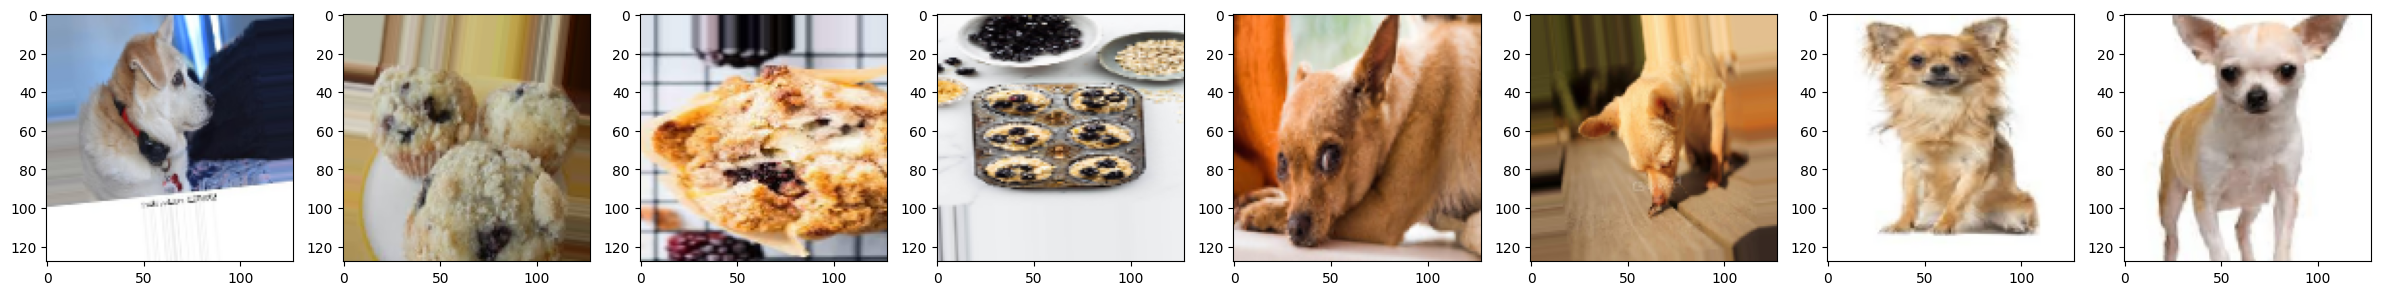

In [23]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

# Construcción del modelo

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (128,128,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 158760)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      40,642,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,643,353 (155.04 MB)

 Trainable params: 40,643,353 (155.04 MB)

 Non-trainable params: 0 (0.00 B)

# Compliacion del modelo

In [25]:
model.compile(
		 loss='binary_crossentropy',
		 optimizer=optimizers.RMSprop(learning_rate=2e-5),
		 metrics=['acc'])

# Entrenamiento del modelo

In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=5
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 60s 383ms/step - acc: 0.8317 - loss: 0.3940 - val_acc: 0.6000 - val_loss: 0.8419
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 57s 367ms/step - acc: 0.8391 - loss: 0.3761 - val_acc: 0.8000 - val_loss: 0.3664
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - acc: 0.8397 - loss: 0.3820 - val_acc: 0.8000 - val_loss: 0.7096
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 357ms/step - acc: 0.8392 - loss: 0.3723 - val_acc: 0.8000 - val_loss: 0.5601
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 84s 370ms/step - acc: 0.8452 - loss: 0.3721 - val_acc: 1.0000 - val_loss: 0.0887
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 58s 373ms/step - acc: 0.8435 - loss: 0.3804 - val_acc: 1.0000 - val_loss: 0.0727
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 58s 364ms/step - acc: 0.8424 - loss: 0.3678 - val_acc: 0.8000 - val_loss: 0.6019
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 369ms/step - acc: 0.8424 - loss: 0.3779 - val_acc: 1.0000 - val_loss: 0.2950
Epoch 9/10
148/148 ━━━━━━━━━━━━━

# Graficas de accuracy contra loss

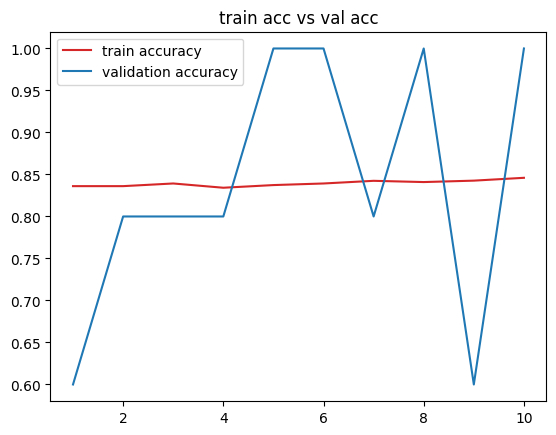

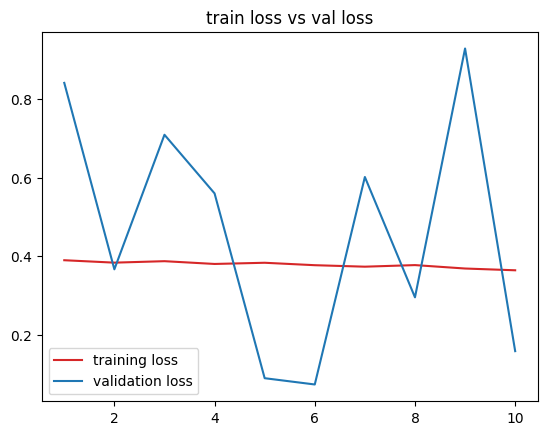

In [32]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'tab:red', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:blue', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'tab:red', label='training loss')
plt.plot(epochs, val_loss, 'tab:blue', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

# Evaluacion del modelo

In [33]:
test_loss, test_acc = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc)

592/592 ━━━━━━━━━━━━━━━━━━━━ 123s 209ms/step - acc: 0.8762 - loss: 0.3131

test acc :
 0.8581081032752991


# Guardar modelo

In [34]:
model.save('chihuahuas_vs_muffins.h5')